In [29]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dataset_path = os.listdir('/kaggle/input/eitdataset/finaldataset')
print (dataset_path) #what kinds of classes are in this dataset
print("Types of classes labels found: ", len(dataset_path))

['non_malignant', 'malignant']
Types of classes labels found:  2


In [30]:
class_labels = []
for item in dataset_path:
# Get all the file names
 all_classes = os.listdir('/kaggle/input/eitdataset/finaldataset' + '/' +item)
#print(all classes)
# Add them to the list
 for room in all_classes:
  class_labels.append((item, str('dataset_path' + '/'+item) + '/' + room))
 #print(class_labels[:5]

In [31]:
# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

          Labels                                          image
0  non_malignant  dataset_path/non_malignant/variation_5164.jpg
1  non_malignant  dataset_path/non_malignant/variation_5214.jpg
2  non_malignant  dataset_path/non_malignant/variation_5256.jpg
3  non_malignant   dataset_path/non_malignant/variation_653.jpg
4  non_malignant  dataset_path/non_malignant/variation_5129.jpg
        Labels                                      image
981  malignant     dataset_path/malignant/variation_7.jpg
982  malignant   dataset_path/malignant/variation_248.jpg
983  malignant  dataset_path/malignant/variation_4105.jpg
984  malignant   dataset_path/malignant/variation_327.jpg
985  malignant  dataset_path/malignant/variation_3191.jpg


In [32]:
print("Total number of images", len(df))
# Let's check how many samples for each category are present print("Total number of images in the dataset: ", len(df))
label_count = df['Labels'].value_counts()
print(label_count)

Total number of images 986
Labels
malignant        604
non_malignant    382
Name: count, dtype: int64


In [33]:

import cv2
path = '/kaggle/input/eitdataset/finaldataset/'
dataset_path = os.listdir('//kaggle/input/eitdataset/finaldataset/')
im_size = 224
images = []
labels = []
for i in dataset_path:
 data_path = path + str(i)
 filenames = [i for i in os.listdir(data_path) ]
 for f in filenames:
   img= cv2.imread(data_path + '/' + f)
   img = cv2.resize(img, (im_size, im_size)) 
   images.append(img)
   labels.append(i)

In [34]:

images = np.array (images)
images = images.astype('float32') / 255.0
images.shape

(986, 224, 224, 3)

In [35]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y=df['Labels'].values
print(y)
y_labelencoder=LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)


['non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_malignant' 'non_malignant' 'non_malignant'
 'non_malignant' 'non_mal

In [36]:
y=y.reshape(-1,1)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer ([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #. toarray()
print(Y[:5])
print(Y[35:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [37]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
images, Y = shuffle (images, Y, random_state=1)
train_x, test_x, train_y, test_y= train_test_split(images, Y, test_size=0.05, random_state=415)
#inpect the shape of the training and testing.
print(train_x.shape)
print (train_y.shape)
print(test_x.shape)
print(test_y.shape)

(936, 224, 224, 3)
(936, 2)
(50, 224, 224, 3)
(50, 2)


In [38]:

from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
NUM_CLASSES = 2
IMG_SIZE = 224
size= (IMG_SIZE, IMG_SIZE)
inputs = layers.Input (shape=(IMG_SIZE, IMG_SIZE, 3))
#Using model without transfer learning
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES) (inputs)

In [39]:
model = tf.keras.Model (inputs, outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
model.summary()
hist= model.fit(train_x, train_y, epochs=25, verbose=1)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 2)              │     4,052,133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5738 - loss: 4.5083
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.6158 - loss: 1.3978
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.6674 - loss: 1.2413
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8943 - loss: 0.3192
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9253 - loss: 0.2551
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9084 - loss: 0.2217
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9278 - loss: 0.2183
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9598 - loss: 0.1291
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9728 - loss: 0.0862
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9596 - loss: 0.1070
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9889 - loss: 0.0276
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step 

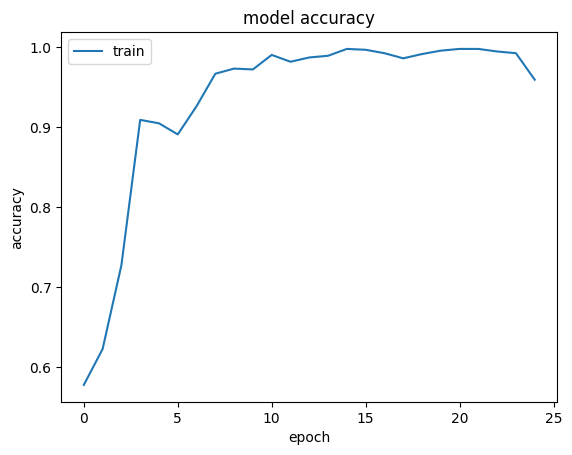

In [40]:
import matplotlib.pyplot as plt
def plot_hist (hist):
 plt.plot(hist.history["accuracy"]) #plt.plot(hist.history["val_accuracy"])
 plt.title("model accuracy")
 plt.ylabel("accuracy")
 plt.xlabel("epoch")
 plt.legend(["train", "validation"], loc="upper left")
 plt.show()

plot_hist(hist)

In [41]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9525 - loss: 0.1175
Loss = 0.09931012243032455
Test Accuracy = 0.9599999785423279


Input image shape: (1, 224, 224, 3)


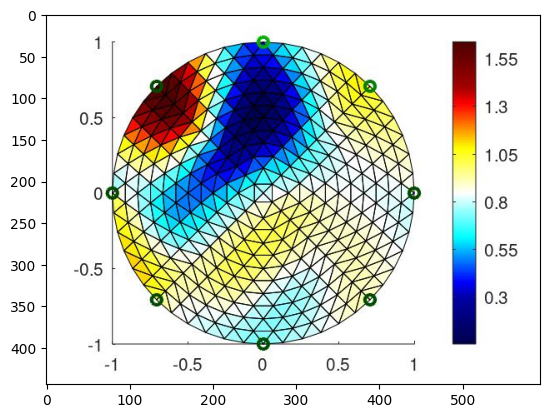

In [42]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import os
img_path = '/kaggle/input/unseen/unseen.jpg'
#img = image. Load_img(img_path, target_size=(224, 224))
#ximg.img_to_array(img)
img= cv2.imread(img_path)
img= cv2.resize(img, (224, 224))

x = np.expand_dims (img, axis=0)
x= preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)

In [43]:
preds=model.predict(x)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([[0., 1.]], dtype=float32)